In [1]:
#First of all, we need to import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
#Uploading the dataset and printing first few rows
car_kick=pd.read_csv('car_kicks.csv')
car_kick.head()

,Unnamed: 0,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,...,Transmission,WheelTypeID,WheelType,Nationality,Size,TopThreeAmericanName,VNZIP1,VNST,IsOnlineSale,Class
0,0,1.289952e+09,2006.0,4,51954.0,6197.0,7062.0,9605.0,10426.0,5341.0,...,AUTO,2.0,Covers,AMERICAN,MEDIUM,CHRYSLER,32124,FL,0,0
1,1,1.242691e+09,2005.0,4,89127.0,3688.0,4783.0,4483.0,5666.0,3688.0,...,AUTO,2.0,Covers,AMERICAN,MEDIUM,FORD,78754,TX,0,0
2,2,1.248221e+09,2006.0,3,71271.0,6897.0,8449.0,7949.0,9625.0,6868.0,...,AUTO,1.0,Alloy,AMERICAN,LARGE,GM,80011,CO,0,0
3,3,1.285718e+09,2008.0,2,83338.0,7878.0,8925.0,11723.0,13026.0,7801.0,...,AUTO,2.0,Covers,AMERICAN,LARGE,GM,94544,CA,0,0
4,4,1.237334e+09,2007.0,2,58698.0,8800.0,10091.0,10004.0,11398.0,7355.0,...,AUTO,1.0,Alloy,AMERICAN,LARGE,GM,77086,TX,0,0


In [3]:
#As we can see we have a duplicate index column, which we can drop before moving forward
car_kick.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
#Now we can call .info() method to get more information about our columns
car_kick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67211 entries, 0 to 67210
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchDate                          67211 non-null  float64
 1   VehYear                            67211 non-null  float64
 2   VehicleAge                         67211 non-null  int64  
 3   VehOdo                             67211 non-null  float64
 4   MMRAcquisitionAuctionAveragePrice  67211 non-null  float64
 5   MMRAcquisitionAuctionCleanPrice    67211 non-null  float64
 6   MMRAcquisitionRetailAveragePrice   67211 non-null  float64
 7   MMRAcquisitonRetailCleanPrice      67211 non-null  float64
 8   MMRCurrentAuctionAveragePrice      67211 non-null  float64
 9   MMRCurrentAuctionCleanPrice        67211 non-null  float64
 10  MMRCurrentRetailAveragePrice       67211 non-null  float64
 11  MMRCurrentRetailCleanPrice         67211 non-null  flo

So we have 29 columns, 8 of which represent the price of the car. We also don't have any missing values.4 of the price columns represent the price of the car when it was bought from the auction, the other 4 - the price of the car when the data was collected. Each of those groups include average and clean prices in both auction and retail.For our analyses we'll only need the prices of the car when it was bought from the auction. So we can drop 4 current price columns.

In [5]:
current_price_cols=['MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']
car_kick.drop(columns=current_price_cols, inplace=True)

Now we'll check the data types and look for outliers in our dataset.

In [6]:
car_kick.describe()

,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,WarrantyCost,WheelTypeID,VNZIP1,IsOnlineSale,Class
count,6.721100e+04,67211.000000,67211.000000,67211.000000,67211.000000,67211.000000,67211.000000,67211.000000,67211.000000,67211.000000,67211.000000,67211.000000,67211.000000
mean,1.263166e+09,2005.352606,4.168588,71734.558971,6162.054589,7411.975123,8538.503787,9895.922423,1278.942301,1.493386,58272.452768,0.025055,0.095461
std,1.820779e+07,1.727873,1.707501,14387.245482,2452.884994,2714.884242,3154.090485,3384.033541,579.077788,0.521232,26117.388216,0.156295,0.293852
min,1.231114e+09,2001.000000,0.000000,5368.000000,0.000000,0.000000,0.000000,0.000000,462.000000,1.000000,2764.000000,0.000000,0.000000
25%,1.247789e+09,2004.000000,3.000000,62163.000000,4311.000000,5456.500000,6319.000000,7525.500000,853.000000,1.000000,32124.000000,0.000000,0.000000
50%,1.264032e+09,2005.000000,4.000000,73530.000000,6163.000000,7380.000000,8498.000000,9868.000000,1169.000000,1.000000,74135.000000,0.000000,0.000000
75%,1.279152e+09,2007.000000,5.000000,82530.000000,7806.000000,9049.000000,10709.500000,12153.500000,1623.000000,2.000000,80022.000000,0.000000,0.000000
max,1.293667e+09,2010.000000,9.000000,115717.000000,35722.000000,36859.000000,39080.000000,40308.000000,7498.000000,3.000000,99224.000000,1.000000,1.000000


The PurchDate column has numeric date time and epoch values for a date. First we need to convert this column.

In [7]:
car_kick['PurchDate']=pd.to_datetime(car_kick['PurchDate'], unit='s')

The other numeric columns seems to not have outliers but we have some 0 values in our price columns which could be considered as missing values.

In [8]:
price_cols=['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice']
price_0=pd.DataFrame()
for col in price_cols:
    df=car_kick[car_kick[col]==0]
    price_0=pd.concat([price_0, df])
price_0.shape[0]

2965

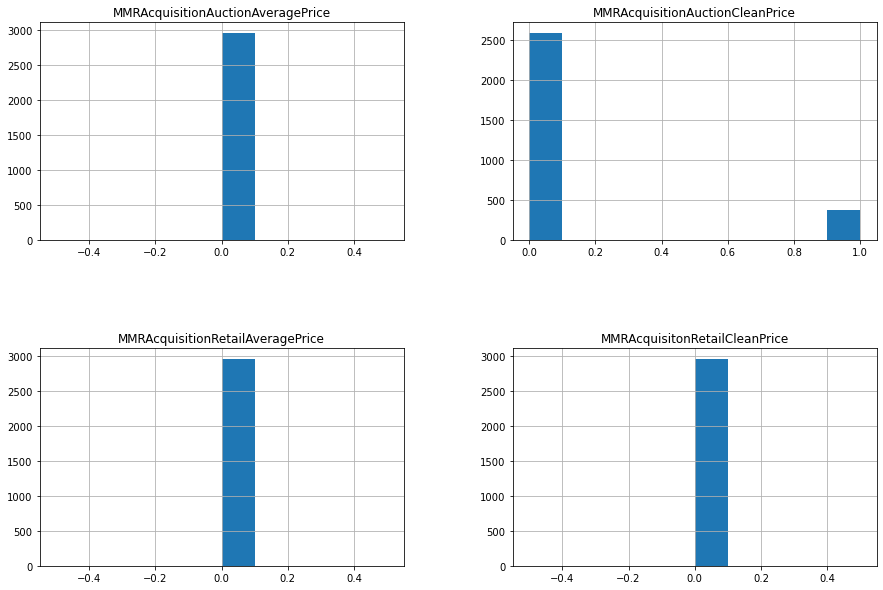

In [9]:
price_0[price_cols].hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

So, we have 2965 rows in our dataset that have 0 values in any of price columns, but how many of them have 0 value in all price columns.


In [10]:
all_0=price_0[(price_0[price_cols]==0).all(axis=1)]
all_0.shape[0]

2596

2596 of our rows have 0 value in all of the price columns which makes them useless for our future model. Let's drop them.


In [11]:
car_kick.drop(index=all_0.index, inplace=True)

Regarding our numeric columns we can also change the data type for 'VehYear', 'VehOdo' 'WheelTypeID', 'VNZIP1' from float to int.


In [12]:
cols_fl=['VehYear', 'VehOdo', 'WheelTypeID', 'VNZIP1']
car_kick[cols_fl]=car_kick[cols_fl].astype('int64')

Now we can take a look at our categorical data.


In [13]:
car_kick['Auction'].value_counts(normalize=True)

MANHEIM    0.576906
OTHER      0.234729
ADESA      0.188366
Name: Auction, dtype: float64

The 'Auction' column shows the names of the auctions where cars were sold. We have 2 main companies - Manheim and Adesa.


In [14]:
car_kick['Auction']=car_kick['Auction'].str.title()

Next, we have car makes.

In [15]:
car_kick['Make'].value_counts()

CHEVROLET         16375
DODGE             12304
FORD              10576
CHRYSLER           8028
PONTIAC            3743
KIA                2224
NISSAN             1948
HYUNDAI            1703
SATURN             1669
JEEP               1546
TOYOTA             1084
MITSUBISHI          955
MAZDA               875
MERCURY             789
BUICK               675
GMC                 608
HONDA               460
SUZUKI              272
OLDSMOBILE          221
ISUZU               128
VOLKSWAGEN          118
SCION               103
VOLVO                36
LINCOLN              30
MINI                 24
SUBARU               24
ACURA                23
CADILLAC             14
INFINITI              3
PLYMOUTH              2
'TOYOTA SCION'        1
LEXUS                 1
Name: Make, dtype: int64

The only problem here is the 'TOYOTA SCION' value which should be either Toyota or Scion


In [16]:
car_kick['Make']=car_kick['Make'].str.replace("'TOYOTA SCION'", "Scion")
car_kick['Make']=car_kick['Make'].str.title()

In [17]:
car_kick['Model'].value_counts()

'PT CRUISER'              2180
IMPALA                    1907
TAURUS                    1346
CALIBER                   1264
'CARAVAN GRAND FWD V6'    1227
                          ... 
'EXCURSION 4WD V8 5.4'       1
'ARMADA 2WD V8'              1
'PROTEGE MFI I-4 1.6L'       1
'CAMRY 4C EI I-4 2.2L'       1
'ENVOY XL 4WD V8 5.3L'       1
Name: Model, Length: 947, dtype: int64

For models we have 953 unique values, but we can clean it by deleting the quotation marks and keeping the first two words of the model (the names of the cars usually are not longer than two words). And in order to eliminate the the additional information from the second word of the model name we can set a minimum limit of 4 characters in that word.

In [18]:
car_kick['Model']=car_kick['Model'].str.replace("'", "")
car_kick['Model']=car_kick['Model'].str.title()
models = car_kick['Model'].str.split(expand=True, n=1)
models.columns=['a', 'b']
print(models)

                a               b
0         Stratus              V6
1          Taurus     3.0L V6 Efi
2           Grand  Prix 3.8L V6 S
3          Impala              V6
4          Impala            None
...           ...             ...
67206          Pt         Cruiser
67207  Pathfinder          2Wd V6
67208       Grand           Am 4C
67209  Rendezvous             Fwd
67210      Mazda6            None

[66562 rows x 2 columns]


In [19]:
models['c']=models.apply(lambda x: (x['a'] if x['b'] is None or len(x['b'].split()[0])<4 else x['a']+ ' ' + x['b'].split()[0]), axis=1)
print(models)

                a               b            c
0         Stratus              V6      Stratus
1          Taurus     3.0L V6 Efi  Taurus 3.0L
2           Grand  Prix 3.8L V6 S   Grand Prix
3          Impala              V6       Impala
4          Impala            None       Impala
...           ...             ...          ...
67206          Pt         Cruiser   Pt Cruiser
67207  Pathfinder          2Wd V6   Pathfinder
67208       Grand           Am 4C        Grand
67209  Rendezvous             Fwd   Rendezvous
67210      Mazda6            None       Mazda6

[66562 rows x 3 columns]


In [20]:
car_kick['Model']=models['c']
car_kick['Model'].value_counts()

Pt Cruiser         3503
Impala             3177
Malibu             2879
Stratus            2446
Sebring            2334
                   ... 
Torrent               1
Concorde 3.2L         1
Azera 3.8L            1
Altima Multiple       1
Sedona 3.5L           1
Name: Model, Length: 321, dtype: int64

Now we have 321 unique values in 'Models' column and we saved the rest of the information in the models dataframe in case we need them for our future analysis.

In [21]:
car_kick['Trim']=car_kick['Trim'].str.title()
car_kick['Trim'].value_counts()

Bas    13158
Ls      9652
Se      8791
Sxt     3684
Lt      3398
       ...  
Har        1
Dur        1
Ll         1
Ult        1
Jls        1
Name: Trim, Length: 132, dtype: int64

For the 'Trim' column the most common value is 'Bas' which stands for 'Basic' or 'Base' and in order to check if that's#the only value that has that meaning we can find all the values that contain 'Ba' letters.

In [22]:
car_kick[car_kick['Trim'].str.contains('Ba')]['Trim'].value_counts()

Bas    13158
Name: Trim, dtype: int64

In [23]:
car_kick['SubModel'].value_counts()

'4D SEDAN'               13298
'4D SEDAN LS'             4523
'4D SEDAN SE'             3632
'4D WAGON'                1946
'MINIVAN 3.3L'            1186
                         ...  
'EXT CAB 3.3L XE'            1
'2D COUPE ZX3 SES'           1
'4D EXT CAB 3.0L'            1
UTILITY                      1
'4D SEDAN LUXURY AWD'        1
Name: SubModel, Length: 807, dtype: int64

The 'Submodel' column shows the body style and the trim information which was also mentioned in 'Trim' column. Therefore we could limit the string of the column to 2 words in order to keep mainly the body style information but for now we can just delete the quotation marks and capitalize it, because we might need extra information for our analysis.

In [24]:
car_kick['SubModel']=car_kick['SubModel'].str.replace("'", "").str.title()

In [25]:
car_kick['Color'].value_counts()

SILVER         13552
WHITE          11152
BLUE            9424
GREY            7363
BLACK           6907
RED             5626
GOLD            4720
GREEN           2932
MAROON          1865
BEIGE           1421
BROWN            413
ORANGE           376
PURPLE           344
YELLOW           232
OTHER            175
'NOT AVAIL'       60
Name: Color, dtype: int64

For the 'Color' column we mostly have clean data, only 60 of the cars have missing values

In [26]:
car_kick['Color']=car_kick['Color'].str.title().str.replace("'", "")

In [27]:
car_kick['TopThreeAmericanName'].value_counts()

GM          23305
CHRYSLER    21880
FORD        11395
OTHER        9982
Name: TopThreeAmericanName, dtype: int64

In [28]:
car_kick['Transmission'].value_counts()

AUTO      64253
MANUAL     2308
Manual        1
Name: Transmission, dtype: int64

In [29]:
car_kick['WheelType'].value_counts()

Alloy      34466
Covers     31371
Special      725
Name: WheelType, dtype: int64

For the three columns above we have clean data. But in our dataset we have 2 columns representing the wheel types: 'WheelType' and 'WheelTypeID'. The types of the wheels are just replace with int values as you can see from the table below.

In [30]:
car_kick.groupby('WheelType')['WheelTypeID'].mean()

WheelType
Alloy      1.0
Covers     2.0
Special    3.0
Name: WheelTypeID, dtype: float64

In [31]:
cols_1=['TopThreeAmericanName', 'Transmission', 'WheelType']
for col in cols_1:
    car_kick[col]=car_kick[col].str.title()

In [32]:
car_kick['Nationality'].value_counts()

AMERICAN            56580
'OTHER ASIAN'        6316
'TOP LINE ASIAN'     3488
OTHER                 178
Name: Nationality, dtype: int64

In [33]:
car_kick['Size'].value_counts()

MEDIUM           28131
LARGE             8410
'MEDIUM SUV'      7109
COMPACT           6509
VAN               5308
'LARGE TRUCK'     2959
'SMALL SUV'       2148
SPECIALTY         1743
CROSSOVER         1398
'LARGE SUV'       1334
'SMALL TRUCK'      790
SPORTS             723
Name: Size, dtype: int64

And for the 'Nationality' and 'Size' columns some of the values have the quotation marks

In [34]:
cols_2=['Nationality', 'Size']
for col in cols_2:
    car_kick[col]=car_kick[col].str.replace("'", "").str.title()

In [35]:
car_kick['VNST'].value_counts()

TX    12655
FL     9569
CA     6402
NC     6225
AZ     5763
CO     4634
SC     3720
OK     3260
GA     2193
VA     1546
TN     1536
MD     1070
UT      795
PA      785
OH      742
MO      731
AL      630
NV      501
MS      480
IN      442
IL      426
IA      426
NJ      312
LA      311
WV      242
NM      217
KY      201
OR      187
ID      172
WA      129
NH       86
MN       61
AR       55
NE       26
MA       13
MI       13
NY        6
Name: VNST, dtype: int64

The 'VNST' column shows which state the navigation system was in. So basically it can show us in which state the car was driven before being sold on auction.

The last 2 columns are 'IsOnlineSale' and 'Class'. The first one shows whether the auction was online or not and the second one is the target column for our future model which shows whether the car is a 'kick' or not.

Now we can take a look at duplicate data. If we consider all the columns for identifying duplicates, we don't have any. But if we use a subset of columns we would find 2 pairs of duplicate rows.

In [36]:
car_dup=car_kick.duplicated()
print(car_kick[car_dup])

Empty DataFrame
Columns: [PurchDate, VehYear, VehicleAge, VehOdo, MMRAcquisitionAuctionAveragePrice, MMRAcquisitionAuctionCleanPrice, MMRAcquisitionRetailAveragePrice, MMRAcquisitonRetailCleanPrice, WarrantyCost, Auction, Make, Model, Trim, SubModel, Color, Transmission, WheelTypeID, WheelType, Nationality, Size, TopThreeAmericanName, VNZIP1, VNST, IsOnlineSale, Class]
Index: []

[0 rows x 25 columns]


In [37]:
subset_1=['VehYear', 'VehOdo', 'Make', 'Model', 'VNZIP1', 'Color', 'MMRAcquisitionAuctionCleanPrice']
car_dup_2=car_kick.duplicated(subset=subset_1, keep=False)
print(car_kick[car_dup_2])

       PurchDate  VehYear  VehicleAge  VehOdo  \
4640  2009-06-18     2006           3   57626   
46534 2009-01-20     2004           5   92005   
49804 2009-05-21     2006           3   57626   
67199 2009-01-20     2004           5   92005   

       MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice  \
4640                              5480.0                           6461.0   
46534                                0.0                              1.0   
49804                             5480.0                           6461.0   
67199                                0.0                              1.0   

       MMRAcquisitionRetailAveragePrice  MMRAcquisitonRetailCleanPrice  \
4640                             6418.0                         7478.0   
46534                               0.0                            0.0   
49804                            6418.0                         7478.0   
67199                               0.0                            0.0  

If we don't consider the auction price as a identifying column we can find 7 more pairs of duplicate data, but the different auction prices and date values make clear that the same cars were sold twice on auctions. Now we can drop those two duplicate rows from our dataset.

In [41]:
car_kick.drop_duplicates(subset=subset_1, inplace=True)

In [42]:
car_kick.head()

,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,WarrantyCost,Auction,...,Transmission,WheelTypeID,WheelType,Nationality,Size,TopThreeAmericanName,VNZIP1,VNST,IsOnlineSale,Class
0,2010-11-17,2006,4,51954,6197.0,7062.0,9605.0,10426.0,1086.0,Manheim,...,Auto,2,Covers,American,Medium,Chrysler,32124,FL,0,0
1,2009-05-19,2005,4,89127,3688.0,4783.0,4483.0,5666.0,983.0,Adesa,...,Auto,2,Covers,American,Medium,Ford,78754,TX,0,0
2,2009-07-22,2006,3,71271,6897.0,8449.0,7949.0,9625.0,1974.0,Manheim,...,Auto,1,Alloy,American,Large,Gm,80011,CO,0,0
3,2010-09-29,2008,2,83338,7878.0,8925.0,11723.0,13026.0,2152.0,Manheim,...,Auto,2,Covers,American,Large,Gm,94544,CA,0,0
4,2009-03-18,2007,2,58698,8800.0,10091.0,10004.0,11398.0,1500.0,Adesa,...,Auto,1,Alloy,American,Large,Gm,77086,TX,0,0


In [44]:
car_kick.to_csv('car_kick2.csv', index=False)